<a href="https://colab.research.google.com/github/sahilfaizal01/Traffic-Sign-Classifier/blob/main/Traffic_Sign_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahilfaizal
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:04<00:00, 133MB/s]


# **Creating Dataset**

In [57]:
data = []
labels = []
classes = 43
cur_path = '/content/gtsrb-german-traffic-sign'
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    dir = os.listdir(path)
    for a in dir:
        image = Image.open(path + '/'+ a)
        image = image.resize((30,30))
        image = np.array(image)
        data.append(image)
        labels.append(i)
        

In [58]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [59]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [60]:
#Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)
# 43 different classes are present

# **Model Building**

In [25]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
lr = 0.001
epochs = 30
opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 8s 7ms/step - loss: 0.3679 - accuracy: 0.9040 - val_loss: 0.0679 - val_accuracy: 0.9819
Epoch 2/30
981/981 [==============================] - 6s 6ms/step - loss: 0.0439 - accuracy: 0.9873 - val_loss: 0.0725 - val_accuracy: 0.9793
Epoch 3/30
981/981 [==============================] - 6s 6ms/step - loss: 0.0284 - accuracy: 0.9919 - val_loss: 0.0340 - val_accuracy: 0.9903
Epoch 4/30
981/981 [==============================] - 6s 6ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0469 - val_accuracy: 0.9871
Epoch 5/30
981/981 [==============================] - 6s 7ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0293 - val_accuracy: 0.9921
Epoch 6/30
981/981 [==============================] - 6s 7ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 7/30
981/981 [==============================] - 7s 7ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0454 - val_accuracy: 0.9869
Epoch 

# **Model Evaluation - Validation Data**

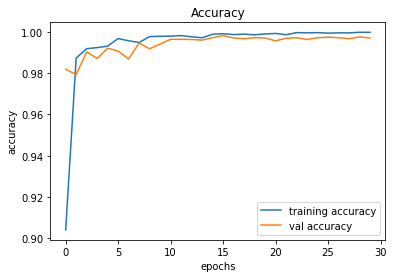

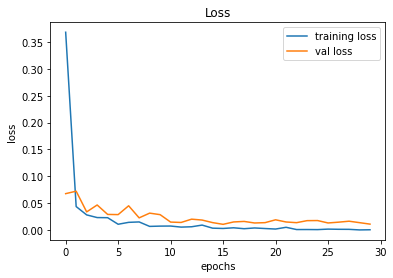

In [26]:

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import glob

In [64]:
pred = (model.predict(X_test) > 0.5).astype("int32")
print(accuracy_score(y_test,pred))

0.9969395562356542


# **Testing on Unseen Data**

In [77]:
data_dir = '/content/gtsrb-german-traffic-sign'

In [78]:
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values
print(imgs)

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']


In [79]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    image = Image.open(data_dir + "/" + img)
    image = image.resize((30,30))
    image = np.array(image)
    data.append(image)

data = np.array(data)
X_test = np.array(data)

pred = (model.predict(X_test) > 0.5).astype("int32")

In [80]:
labels

array([16,  1, 38, ...,  6,  7, 10])

In [81]:
labels = keras.utils.to_categorical(labels, 43)

In [82]:
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  98.28978622327791


In [85]:
model.save("traffic_sign_classifier_best.h5")

In [86]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       1.00      0.95      0.97       450
           4       1.00      0.99      0.99       660
           5       0.97      0.99      0.98       630
           6       1.00      0.92      0.96       150
           7       0.98      0.99      0.99       450
           8       0.98      1.00      0.99       450
           9       0.99      0.99      0.99       480
          10       0.99      1.00      0.99       660
          11       0.99      0.98      0.99       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       1.00      0.99      1.00       150
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


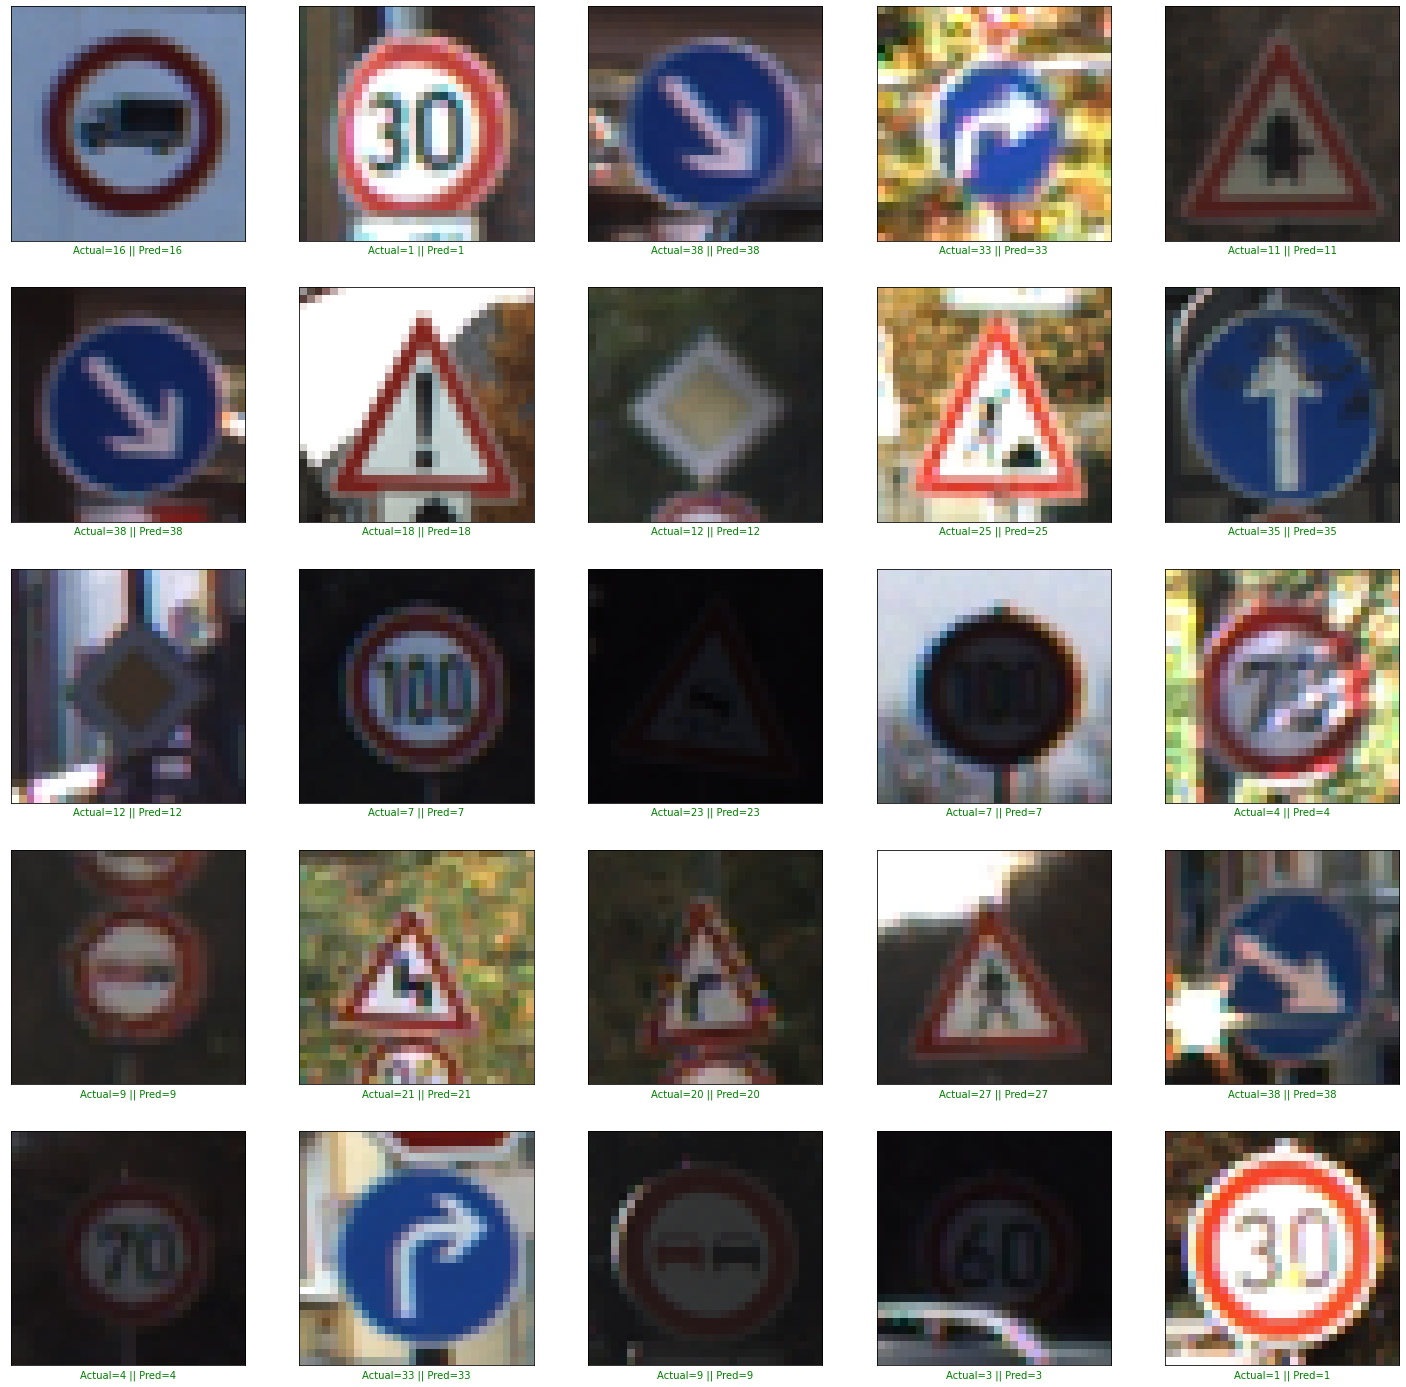

In [91]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = np.argmax(pred[start_index + i],axis=0)
    actual = np.argmax(labels[start_index + i],axis=0)
    col = 'g'
    if actual != prediction:
      col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()